<a href="https://colab.research.google.com/github/aditi10998/EDA_Captsone_Project_2/blob/main/Copy_of_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In this Capstone Project.We are going to going to build a model using regression in Machine learning for forecasting the "Sales" column for the test set.
Let's first understand what is regression technique.
Regression analysis is a statistical method to model the relationship between a dependent (target) and independent (predictor) variables with one or more independent variables. More specifically, Regression analysis helps us to understand how the value of the dependent variable is changing corresponding to an independent variable when other independent variables are held fixed. It predicts continuous/real values such as temperature, age, salary, price, etc.

---




We will import other libraries as per our requirement.

In [2]:
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets

To begin we will first need to explore our dataset.
Let's import our csv files and convert into dataframes.
Here we have two datasets Rossmann Stores Data and stores which consist of information of stores and stores related aspects.

In [4]:
File1="/content/drive/MyDrive/EDA_Capstone_Project2/Data & Resources/Copy of Rossmann Stores Data.csv"
File2="/content/drive/MyDrive/EDA_Capstone_Project2/Data & Resources/Copy of store.csv"

In [5]:
#Loading the files
Rossmann_Stores_df=pd.read_csv(File1)
Store_df=pd.read_csv(File2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Let's perform simple tasks on our dataset and explore it more by usng different methods.

In [6]:
#To display total number of rows and columns
Rossmann_Stores_df.shape

(1017209, 9)

In this dataset we can see rows are 1017209 and columns are 9.In all it is very huge data.

In [7]:
#to display total number of rows and columns
Store_df.shape

(1115, 10)

In this dataset there are 1115 rows and 10 columns.As compared to previous dataset this is not that large amount of data.




In [8]:
#To display names of column ,thier datatypes and missing values
Rossmann_Stores_df.info()
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assort

In [9]:
#To overview statistics approach of numerical variables
Rossmann_Stores_df.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
Store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
#To display first n number of rows 
Rossmann_Stores_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [ ]:
Store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [ ]:
#To display last n number of rows 
Rossmann_Stores_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
Store_df.tail(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


Let's begin with our Data Cleaning Process.



There might be some missing values in store dataset in the columns CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear and PromoInterval because total number of rows are 1115. Wheareas these columns don't have 1115 enteries.Let's perform some operations to make sure that there should not be any missing values.Handling missing values is very important because all machine learning models does not work with missing data and that will simply lead to error.

In [11]:
#To check null values
Store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

We saw that are missing values in our dataset but still performing isnull operation helps us to identify missing values more accurately and identifies the null values column if we missed it.

In [12]:
#Handling missing values
Store_df['CompetitionDistance'] = Store_df['CompetitionDistance'].fillna(Store_df['CompetitionDistance']).mean()
Store_df['CompetitionOpenSinceMonth'] = Store_df['CompetitionOpenSinceMonth'].fillna(Store_df['CompetitionOpenSinceMonth'].mode()[0])
Store_df['CompetitionOpenSinceYear'] = Store_df['CompetitionOpenSinceYear'].fillna(Store_df['CompetitionOpenSinceYear'].mode()[0])
Store_df.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1,inplace=True)

Here we handled missing data with simply filling them with their respective mode,mean and 0 values according to their type of data.

In [13]:
Store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

In [14]:
Store_df.sample(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
419,420,d,c,5404.901079,9.0,2013.0,1
889,890,a,a,5404.901079,9.0,2013.0,1
832,833,d,c,5404.901079,12.0,1999.0,1
683,684,d,c,5404.901079,9.0,2013.0,1
546,547,d,c,5404.901079,11.0,2009.0,1
984,985,c,c,5404.901079,5.0,2007.0,1
328,329,a,a,5404.901079,6.0,1990.0,1
560,561,d,a,5404.901079,9.0,2013.0,0
796,797,a,a,5404.901079,10.0,2012.0,1
1001,1002,d,c,5404.901079,11.0,2008.0,0


Checking for duplicated items present in our dataset.

In [15]:
dupes=Rossmann_Stores_df.duplicated()
dupes.sum()

0

Further we will need to perform operation to check if their are any outliers and will need to remove them.

In [16]:
(Rossmann_Stores_df['Sales']==0).sum()

172871

In [17]:
Rossmann_Stores_df=Rossmann_Stores_df[Rossmann_Stores_df.Sales !=0]

In [18]:
Rossmann_Stores_df.shape

(844338, 9)

Distribution of sales(target variable)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


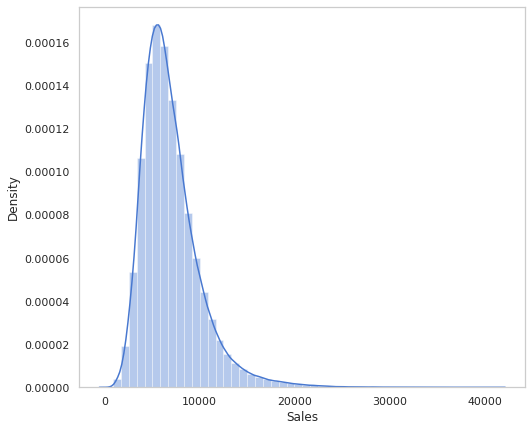

In [19]:
sns.set_theme(rc={'figure.figsize': (8,7)},style='whitegrid',palette='muted')
ax = sns.distplot(Rossmann_Stores_df['Sales'])
ax.grid(False)


Conclusion:Target variable is almost normally distributed.
We will know perform square-root for moderate skew which is sqrt(x) for positively skewed data,sqrt(max(x+1)-x) for negatively skewed data.

Here is some information about skewness from Source:Kaggle.
What is Data Skewness?
Data Skewness is asymmetry in a statistical distribution, in which the curve appears distorted or skewed either to the left or to the right. Skewness can be quantified to define the extent to which a distribution differs from a normal distribution.

Normal Distribution
In a normal distribution, the graph appears as a classical, symmetrical “bell-shaped curve.” The mean, or average, and the mode, or maximum point on the curve, are equal.


Types of Skewness
In a symmetric bell curve, the mean, median, and mode are all the same value. But in a skewed distribution, the mean, median, and mode are all different values.
A skewed data distribution or bell curve can be either positive or negative.

Positively Skewed Distribution
A positively skewed distribution means that the extreme data results are larger. This skews the data in that it brings the mean (average) up. The mean will be larger than the median in a Positively skewed distribution.


Negatively Skewed Distribution
A negatively skewed distribution means the opposite: that the extreme data results are smaller. This means that the mean is brought down, and the median is larger than the mean in a negatively skewed distribution.

Reducing skewness
A data transformation may be used to reduce skewness. A distribution that is symmetric or nearly so is often easier to handle and interpret than a skewed distribution. More specifically, a normal or Gaussian distribution is often regarded as ideal as it is assumed by many statistical methods.

Reducing Right Skewness
Right skewness can be reduced applying following transformation

Square root
The square root, x to x^(1/2) = sqrt(x), is a transformation with a
moderate effect on distribution shape: it is weaker than the logarithm
and the cube root. It is also used for reducing right skewness, and also
has the advantage that it can be applied to zero values. Note that the
square root of an area has the units of a length. It is commonly applied
to counted data, especially if the values are mostly rather small.

In [20]:
Rossmann_Stores_df['Sales']=np.sqrt(Rossmann_Stores_df['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


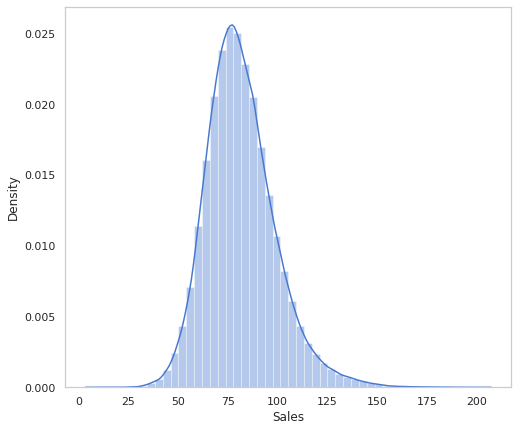

In [21]:
sns.set_theme(rc={'figure.figsize': (8,7)},style='whitegrid',palette='muted')
ax = sns.distplot(Rossmann_Stores_df['Sales'])
ax.grid(False)

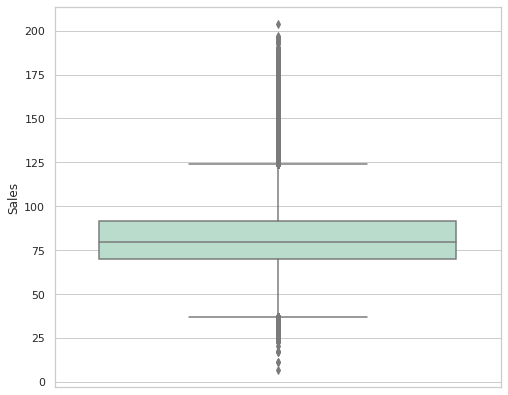

In [22]:
sns.set_style('whitegrid')
sns.boxplot(y=Rossmann_Stores_df['Sales'], palette='Pastel2');
plt.show()

Let's remove the Outlier present in our target variable.

In [23]:
percentile_25 = np.percentile(Rossmann_Stores_df['Sales'],25)
percentile_75 = np.percentile(Rossmann_Stores_df['Sales'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr

In [24]:
Rossmann_Stores_df.drop(index=Rossmann_Stores_df[Rossmann_Stores_df['Sales']>upper_outlier_bound].index,axis=0,inplace=True)
Rossmann_Stores_df.drop(index=Rossmann_Stores_df[Rossmann_Stores_df['Sales']<lower_outlier_bound].index,axis=0,inplace=True)


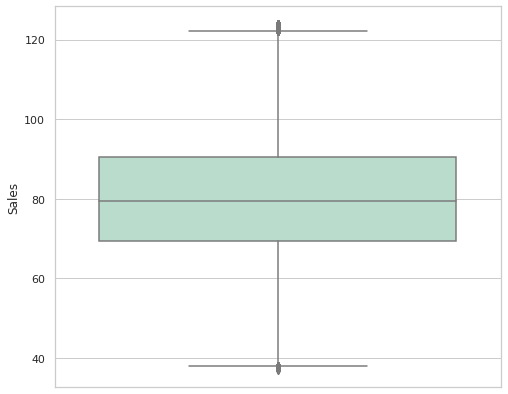

In [25]:
sns.set_style('whitegrid')
sns.boxplot(y=Rossmann_Stores_df['Sales'], palette='Pastel2');
plt.show()

In [26]:
Rossmann_Stores_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,72.546537,555,1,1,0,1
1,2,5,2015-07-31,77.871689,625,1,1,0,1
2,3,5,2015-07-31,91.181138,821,1,1,0,1
3,4,5,2015-07-31,118.300465,1498,1,1,0,1
4,5,5,2015-07-31,69.440622,559,1,1,0,1


**Numerical Variables**

In [27]:
#To display total number of numerical values in the data
numerical_features=[feature for feature in Rossmann_Stores_df.columns if Rossmann_Stores_df[feature].dtypes!=0]
print('Number of numerical values:',len(numerical_features))

Rossmann_Stores_df[numerical_features].head()


Number of numerical values: 9


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,72.546537,555,1,1,0,1
1,2,5,2015-07-31,77.871689,625,1,1,0,1
2,3,5,2015-07-31,91.181138,821,1,1,0,1
3,4,5,2015-07-31,118.300465,1498,1,1,0,1
4,5,5,2015-07-31,69.440622,559,1,1,0,1


In [28]:
#For Columns
numerical_features=[feature for feature in Store_df.columns if Store_df[feature].dtypes!=0]
print('Number of numerical values:',len(numerical_features))

Store_df[numerical_features].head()

Number of numerical values: 7


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,c,a,5404.901079,9.0,2008.0,0
1,2,a,a,5404.901079,11.0,2007.0,1
2,3,a,a,5404.901079,12.0,2006.0,1
3,4,c,c,5404.901079,9.0,2009.0,0
4,5,a,a,5404.901079,4.0,2015.0,0


In [29]:
merged_df=pd.merge(left=Rossmann_Stores_df,right=Store_df ,how='left',on='Store')
merged_df.shape

(825571, 15)

** Categorical Data**
We have seen in the previous data analysis that there are some categorical data for the columns such as State holiday,School holiday,Store type,Assortment,etc.
Let's further analyse them.

In [30]:
merged_df.sample(10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
332577,799,2,2014-07-01,112.601066,1021,1,1,0,0,a,c,5404.901079,9.0,2013.0,0
278264,613,1,2014-09-08,79.849859,898,1,0,0,0,c,a,5404.901079,6.0,2007.0,1
542211,91,4,2013-11-07,73.905345,641,1,1,0,0,c,a,5404.901079,9.0,2013.0,1
176865,47,6,2015-01-17,74.269779,773,1,0,0,0,a,c,5404.901079,4.0,2013.0,1
187628,929,3,2015-01-07,79.555012,753,1,1,0,0,a,c,5404.901079,9.0,2013.0,0
800650,187,1,2013-01-28,68.563839,686,1,0,0,0,a,c,5404.901079,9.0,2013.0,0
453817,83,5,2014-02-14,57.393379,345,1,0,0,0,a,a,5404.901079,9.0,2013.0,0
434467,413,5,2014-03-07,90.260733,1005,1,1,0,1,a,c,5404.901079,9.0,2014.0,0
814188,606,1,2013-01-14,71.693793,618,1,0,0,0,a,a,5404.901079,11.0,2007.0,0
750638,384,5,2013-03-22,95.702665,974,1,1,0,0,a,c,5404.901079,9.0,2013.0,1


In [ ]:
merged_df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                        float64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
dtype: object

Here we can see that there are columns like Date,StateHoliday,SchoolHoliday,Storetype,Assortment which are of datatypes object but in machine learning, algorithm works quite well with numerical data.
Let's perform some operation to make them work.

In [ ]:
#merged_df['StoreType'].value_counts()
merged_df['StoreType'].nunique()

4

In [ ]:
merged_df['Assortment'].nunique()

3

In [ ]:
merged_df['StateHoliday'].nunique()

5

Performing one hot encoding for the StoreType and Assortment.

In [40]:
pd.get_dummies(merged_df,columns=['StoreType','Assortment'])
#k-1 hot encoding
 #pd.get_dummies(df,columns=['Storetype','Assortment','StateHoliday'],drop_first=True)
 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,year,month,week,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,72.546537,555,1,1,0,1,5404.901079,9.0,2008.0,0,2015,7,31,0,0,1,0,1,0,0
1,2,5,2015-07-31,77.871689,625,1,1,0,1,5404.901079,11.0,2007.0,1,2015,7,31,1,0,0,0,1,0,0
2,3,5,2015-07-31,91.181138,821,1,1,0,1,5404.901079,12.0,2006.0,1,2015,7,31,1,0,0,0,1,0,0
3,4,5,2015-07-31,118.300465,1498,1,1,0,1,5404.901079,9.0,2009.0,0,2015,7,31,0,0,1,0,0,0,1
4,5,5,2015-07-31,69.440622,559,1,1,0,1,5404.901079,4.0,2015.0,0,2015,7,31,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825566,682,2,2013-01-01,58.094750,566,1,0,1,1,5404.901079,9.0,2006.0,0,2013,1,1,0,1,0,0,1,0,0
825567,733,2,2013-01-01,103.754518,2377,1,0,1,1,5404.901079,10.0,1999.0,0,2013,1,1,0,1,0,0,0,1,0
825568,769,2,2013-01-01,70.957734,1248,1,0,1,1,5404.901079,9.0,2013.0,1,2013,1,1,0,1,0,0,0,1,0
825569,948,2,2013-01-01,67.014924,1039,1,0,1,1,5404.901079,9.0,2013.0,0,2013,1,1,0,1,0,0,0,1,0


This above code can be used but it is not relevant.

In [31]:
#Convert the a,b,c into 1 as they represent Holiday
merged_df["StateHoliday"] = merged_df['StateHoliday'].apply(lambda x: str(x).replace('a',"1") if 'a' in str(x) else x)
merged_df["StateHoliday"] = merged_df['StateHoliday'].apply(lambda x: str(x).replace('b',"1") if 'b' in str(x) else x)
merged_df["StateHoliday"] = merged_df['StateHoliday'].apply(lambda x: str(x).replace('c',"1") if 'c' in str(x) else x)

merged_df["StateHoliday"] = merged_df["StateHoliday"].astype(int)

In [33]:
merged_df['StateHoliday'].value_counts()

0    824798
1       773
Name: StateHoliday, dtype: int64

Converting datetime object into year,week and month format.

In [36]:
merged_df['Date']=pd.to_datetime(merged_df['Date'])

In [37]:
merged_df['Date'].dtypes

dtype('<M8[ns]')

In [38]:
merged_df['year']=merged_df['Date'].dt.year
merged_df['month']=merged_df['Date'].dt.month
merged_df['week']=merged_df['Date'].dt.week


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


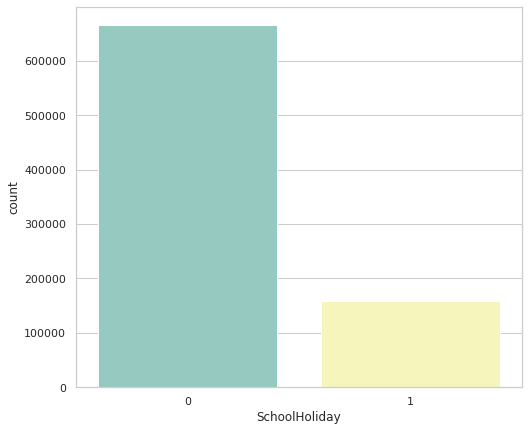

In [44]:
sns.countplot(x='SchoolHoliday',data=merged_df,palette='Set3')

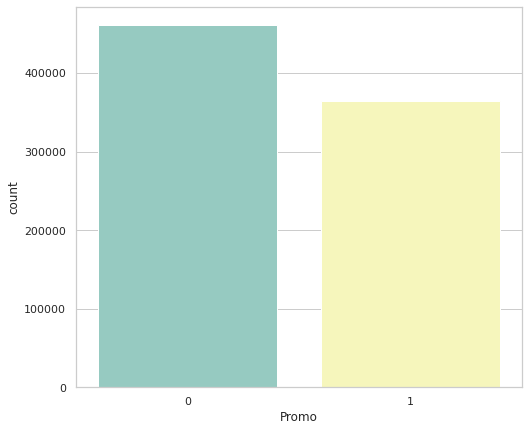

In [45]:
sns.countplot(x='Promo',data=merged_df,palette='Set3')

SyntaxError: ignored